## **Sparks Foundation - Task 2 by Thanushri R**

## **KMeans Clustering in Python**

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np

#### Load the dataset

In [2]:
iris_data=pd.read_csv('C:\\Users\\HP\\Desktop\\ML intern\\Shape.AI\\Iris.csv')
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Scatterplot of the datapoints

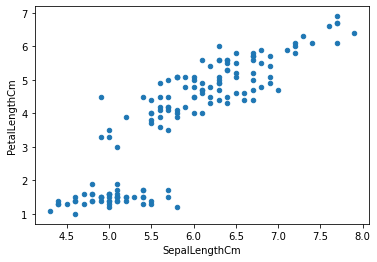

In [3]:
import matplotlib.pyplot as plt
iris_data.plot(kind ="scatter", x ='SepalLengthCm', y ='PetalLengthCm') 
plt.show() 

#### Boxplot of SepalLengthCm for the different species

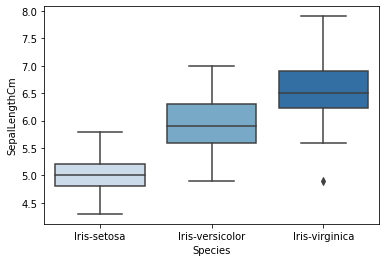

In [4]:
import seaborn as sns
ax = sns.boxplot(x=iris_data["Species"],y=iris_data["SepalLengthCm"],palette="Blues")

#### Boxplot of SepalWidthCm for the different species

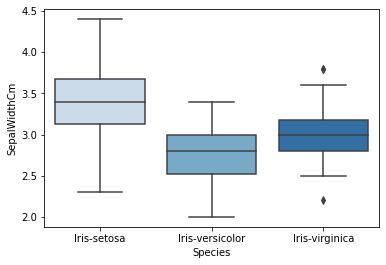

In [5]:
ax = sns.boxplot(x=iris_data["Species"],y=iris_data["SepalWidthCm"],palette="Blues")

#### Boxplot of PetalLengthCm for the different species

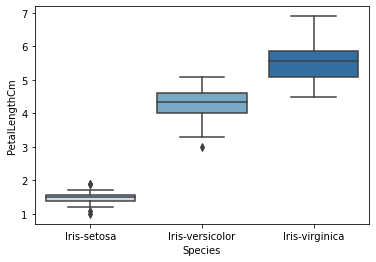

In [6]:
ax = sns.boxplot(x=iris_data["Species"],y=iris_data["PetalLengthCm"],palette="Blues")

#### Boxplot of PetalWidthCm for the different species

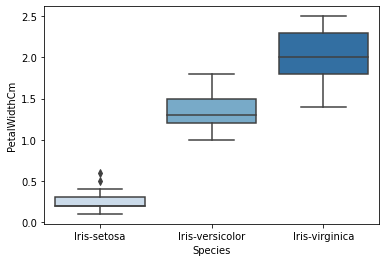

In [7]:
ax = sns.boxplot(x=iris_data["Species"],y=iris_data["PetalWidthCm"],palette="Blues")

#### Piechart of the count of the different species

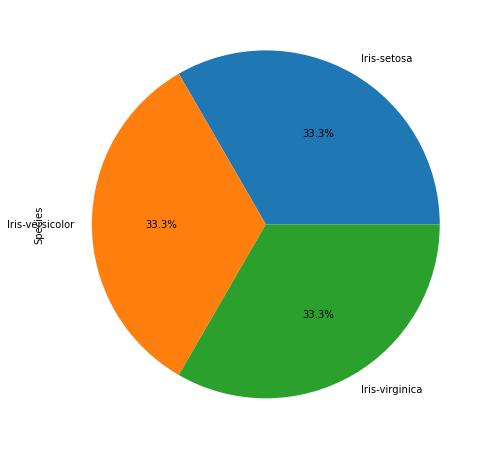

In [8]:
iris_data_value=iris_data['Species'].value_counts()
iris_data_value.plot.pie(figsize=(10,8),autopct='%1.1f%%')
plt.show()

#### Seabornplot of SepalWidthCm and PetalWidthCm for the different species

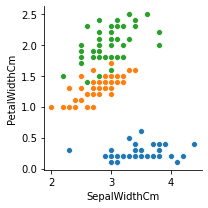

In [9]:
g = sns.FacetGrid(iris_data, hue="Species")
g.map(sns.scatterplot, "SepalWidthCm", "PetalWidthCm")

#### Elbow method for KMeans Clustering

In [10]:
from sklearn.cluster import KMeans

def elbow(dataset, K):
    sum_squared_error=[]
    for k in K:
        kmeans=KMeans(n_clusters=k).fit(dataset)
        centroids=kmeans.cluster_centers_
        predicted_clusters=kmeans.predict(dataset)
        for_each_k_sse=0
        # calculate sum of squared errors with Euclidean distance
        for i in range(0,len(dataset)):
            clus_center=centroids[predicted_clusters[i]]
            for_each_k_sse += (clus_center[0] - dataset[i][0])**2 + (clus_center[1] - dataset[i][1])**2
        sum_squared_error.append(for_each_k_sse)
    return sum_squared_error

#### Dataset preprocessing to input it to the elbow function

In [11]:
import matplotlib.pyplot as plt
import math

dataset_mod=iris_data.iloc[:,[1,2,3,4]]
K=range(1,10)
d=np.array(dataset_mod)

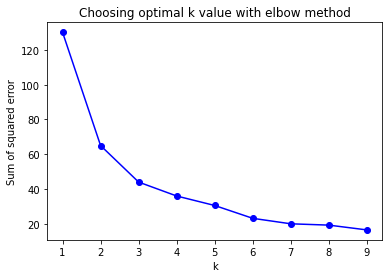

In [12]:
sum_squared_error=elbow(d,K)
plt.plot(K, sum_squared_error, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.title('Choosing optimal k value with elbow method')
plt.show()

#### Therefore, k=3 is the optimal value for the dataset.

#### Printing the values of the cluster centres

In [13]:
kmeans=KMeans(n_clusters=3)
y_pred=kmeans.fit_predict(d)
#print(y_pred)
print('Cluster centers:',kmeans.cluster_centers_)

Cluster centers: [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
